# Image Restoration
- Bazı resimlerdeki eksik kısımları doldurmak için kullanılır.
- Mantığı eksik kısımların değerlerinin tespit edilip 0 lardan oluşan bir matris içinde tespit edilen noktlara 1 atayarak bir maske oluşturmak ve bu maskeyi orijinal resimle çarpıp eksik kısımları doldurmak.

(<matplotlib.image.AxesImage at 0x7f4b48ab7400>, (-0.5, 511.5, 511.5, -0.5))

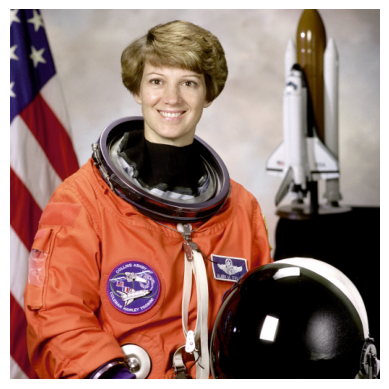

In [1]:
from skimage import data 
import matplotlib.pyplot as plt

# Load the image
astronaut = data.astronaut()
plt.imshow(astronaut), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f4b480f2050>, (-0.5, 511.5, 511.5, -0.5))

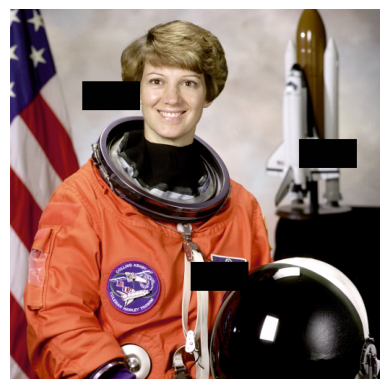

In [2]:
# Görüntüden bazı kısımları eksiltelim 
import numpy as np
cut1 = np.ones((40, 80 ,3))
astronaut[100:140, 100:180] = cut1

cut2 = np.ones((40, 80 ,3))
astronaut[180:220, 400:480] = cut2

cut3 = np.ones((40, 80 ,3))
astronaut[350:390, 250:330] = cut3

plt.imshow(astronaut), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f4b48127c70>, (-0.5, 511.5, 511.5, -0.5))

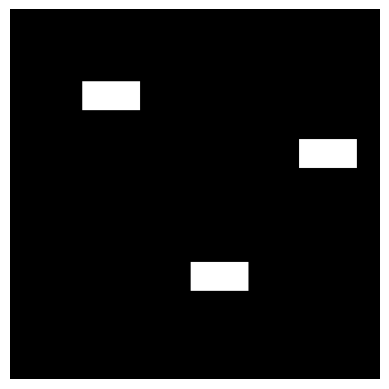

In [3]:
# Bozuk kısımların maskesini oluşturalım
def get_mask(image):
    mask = np.zeros(image.shape[:-1])
    mask[100:140, 100:180] = 1
    mask[180:220, 400:480] = 1
    mask[350:390, 250:330] = 1
    return mask
# Maski görselleştirelim
mask = get_mask(astronaut)
plt.imshow(mask, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f4b40aa0a00>, (-0.5, 511.5, 511.5, -0.5))

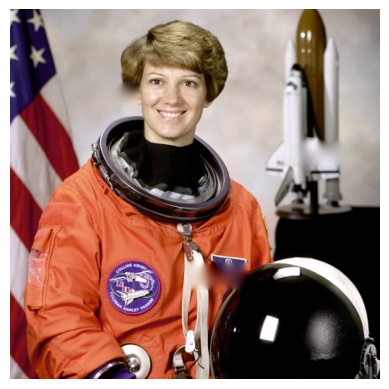

In [4]:
# Görüntüyü onaralım
from skimage.restoration import inpaint 

restored_image = inpaint.inpaint_biharmonic(astronaut, mask, multichannel=True)

plt.imshow(restored_image), plt.axis('off')